### PACKAGES


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

### Get the data

In [46]:
df = pd.read_csv("C:/Users/ADMIN/Downloads/archive (1)/train.csv")

### Data preprocessing

In [47]:
df.head() 

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [48]:
df.shape

(2016, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [50]:
for column in df.columns:
    print(df[column])
    print("___________________________")
    

0       3
1       4
2       4
3       4
4       2
       ..
2011    3
2012    1
2013    4
2014    2
2015    3
Name: beds, Length: 2016, dtype: int64
___________________________
0       2.5
1       2.0
2       3.0
3       3.0
4       2.0
       ... 
2011    2.0
2012    1.0
2013    2.0
2014    2.0
2015    2.0
Name: baths, Length: 2016, dtype: float64
___________________________
0       2590.0
1       2240.0
2       2040.0
3       3800.0
4       1042.0
         ...  
2011    1370.0
2012     889.0
2013    2140.0
2014     795.0
2015    1710.0
Name: size, Length: 2016, dtype: float64
___________________________
0       sqft
1       sqft
2       sqft
3       sqft
4       sqft
        ... 
2011    sqft
2012    sqft
2013    sqft
2014    sqft
2015    sqft
Name: size_units, Length: 2016, dtype: object
___________________________
0       6000.00
1          0.31
2       3783.00
3       5175.00
4           NaN
         ...   
2011       0.50
2012        NaN
2013    6250.00
2014        NaN
2015    42

### Data Cleaning

In [51]:
df.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [52]:
df['lot_size'].fillna(df['lot_size'].mode()[0], inplace=True)
df['lot_size_units'].fillna(df['lot_size_units'].mode()[0], inplace=True)

In [53]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,4065.376305,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2510.646098,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1563.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,5000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,5480.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [54]:
df['beds'].value_counts()

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64

In [55]:
df['price_per_sqrft'] = df['price']*100000 / df['size']
df['price_per_sqrft']

0       3.069498e+07
1       4.084821e+07
2       4.656863e+07
3       5.131579e+07
4       9.117083e+07
            ...     
2011    6.642336e+07
2012    6.186727e+07
2013    5.373832e+07
2014    7.421384e+07
2015    3.853801e+07
Name: price_per_sqrft, Length: 2016, dtype: float64

In [56]:
df.drop(columns='size_units', inplace=True)
df.drop(columns='price_per_sqrft', inplace=True)
df.drop(columns='lot_size_units', inplace=True)


In [57]:
df.to_csv("cleaned_data.csv")

### Exploratory Data Analysis

In [58]:
df.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.00,98144,795000.0
1,4,2.0,2240.0,0.31,98106,915000.0
2,4,3.0,2040.0,3783.00,98107,950000.0
3,4,3.0,3800.0,5175.00,98199,1950000.0
4,2,2.0,1042.0,5000.00,98102,950000.0


In [59]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 0
Float variables: 4


In [60]:
df.beds.unique()

array([ 3,  4,  2,  1,  5,  6,  9, 15, 14,  8,  7], dtype=int64)

<Axes: >

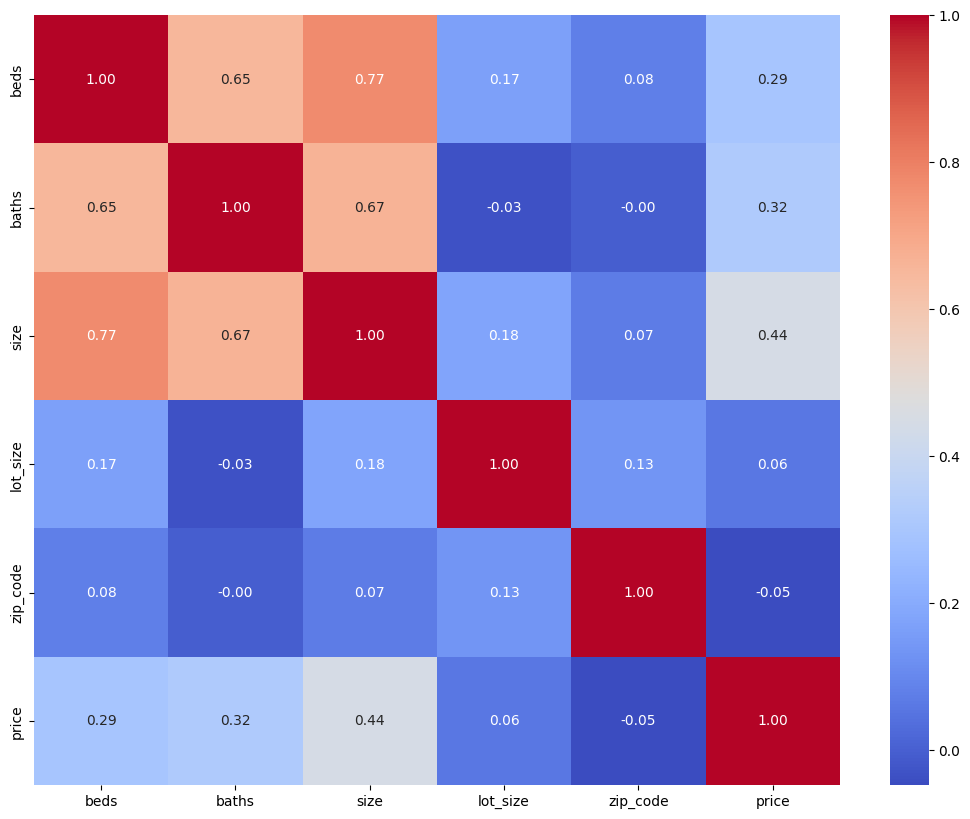

In [61]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [62]:

 
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0


### Train Dataset

In [63]:
 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df.drop(['price'], axis=1)
Y = df['price']
 
# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

### SVM model

In [64]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.3812068483633163


### Regression Model 

In [65]:
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.22489314952275233

### Random Forest

In [67]:
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [74]:

#prediction model
y_pred = model.predict(X_valid)
mse = mean_squared_error(Y_valid, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 139485623594.0975
